In [1]:
pip install pandas

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

INDIAN DATASET

In [3]:
df=pd.read_excel("IN_Data.xlsx")

In [4]:
df

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27
...,...,...,...,...,...
69995,35280V26PS,49,F,861770,2018-04-08
69996,79863N01VR,59,M,888976,2018-05-17
69997,94236O99QE,33,M,699676,2019-04-21
69998,23696V12DP,41,M,1881922,2018-07-14


In [5]:
df.shape

(70000, 5)

In [6]:
df.head

<bound method NDFrame.head of                ID  CURR_AGE GENDER  ANN_INCOME   DT_MAINT
0      20710B05XL        54      M     1425390 2018-04-20
1      89602T51HX        47      M     1678954 2018-06-08
2      70190Z52IP        60      M      931624 2017-07-31
3      25623V15MU        55      F     1106320 2017-07-31
4      36230I68CE        32      F      748465 2019-01-27
...           ...       ...    ...         ...        ...
69995  35280V26PS        49      F      861770 2018-04-08
69996  79863N01VR        59      M      888976 2018-05-17
69997  94236O99QE        33      M      699676 2019-04-21
69998  23696V12DP        41      M     1881922 2018-07-14
69999  36285R14DU        53      M     1897605 2018-05-13

[70000 rows x 5 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          70000 non-null  object        
 1   CURR_AGE    70000 non-null  int64         
 2   GENDER      70000 non-null  object        
 3   ANN_INCOME  70000 non-null  int64         
 4   DT_MAINT    70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


In [8]:
pd.isnull(df)

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
69995,False,False,False,False,False
69996,False,False,False,False,False
69997,False,False,False,False,False
69998,False,False,False,False,False


In [17]:
df.describe()

,CURR_AGE,ANN_INCOME,DT_MAINT
count,70000.000000,7.000000e+04,70000
mean,44.995314,1.148679e+06,2018-06-28 16:10:28.662856960
min,25.000000,3.000330e+05,2016-09-14 00:00:00
25%,35.000000,8.568238e+05,2018-03-15 00:00:00
50%,45.000000,1.125152e+06,2018-07-26 00:00:00
75%,55.000000,1.438676e+06,2018-12-24 00:00:00
max,65.000000,1.999989e+06,2019-06-30 00:00:00
std,11.822122,3.994505e+05,NaN


In [20]:
pd.isnull(df).sum

<bound method DataFrame.sum of           ID  CURR_AGE  GENDER  ANN_INCOME  DT_MAINT
0      False     False   False       False     False
1      False     False   False       False     False
2      False     False   False       False     False
3      False     False   False       False     False
4      False     False   False       False     False
...      ...       ...     ...         ...       ...
69995  False     False   False       False     False
69996  False     False   False       False     False
69997  False     False   False       False     False
69998  False     False   False       False     False
69999  False     False   False       False     False

[70000 rows x 5 columns]>

In [21]:
df.columns

Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT'], dtype='object')

In [22]:
df[['GENDER','ANN_INCOME']].describe()

,ANN_INCOME
count,7.000000e+04
mean,1.148679e+06
std,3.994505e+05
min,3.000330e+05
25%,8.568238e+05
50%,1.125152e+06
75%,1.438676e+06
max,1.999989e+06


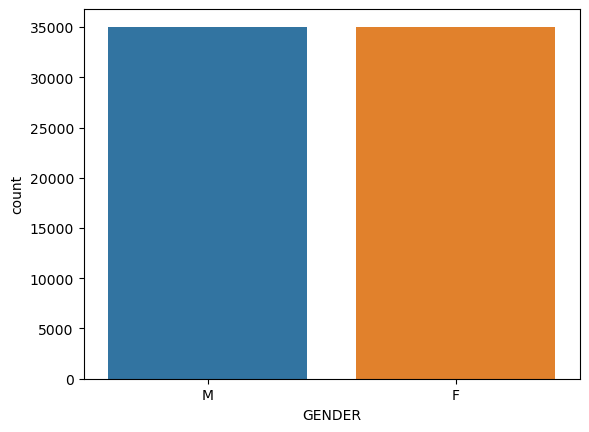

In [25]:
ax=sns.countplot(x='GENDER',data=df)

<Axes: xlabel='GENDER', ylabel='ANN_INCOME'>

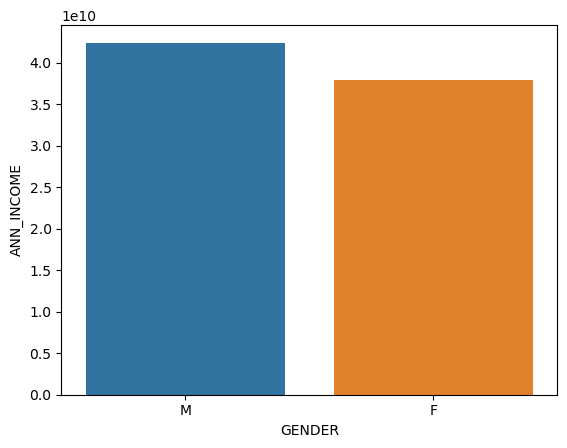

In [28]:
sales_gen = df.groupby(['GENDER'], as_index=False)['ANN_INCOME'].sum().sort_values(by='ANN_INCOME', ascending=False)

sns.barplot(x = 'GENDER',y= 'ANN_INCOME' ,data = sales_gen)

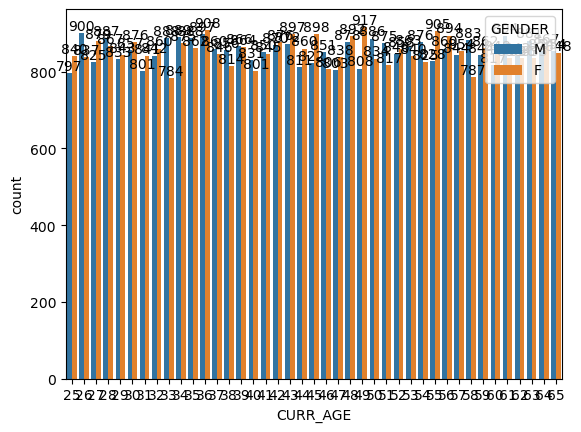

<Figure size 500x2000 with 0 Axes>

In [35]:
ax = sns.countplot(data = df, x = 'CURR_AGE', hue='GENDER')
plt.figure(figsize=(5,20))
for bars in ax.containers:
    ax.bar_label(bars)

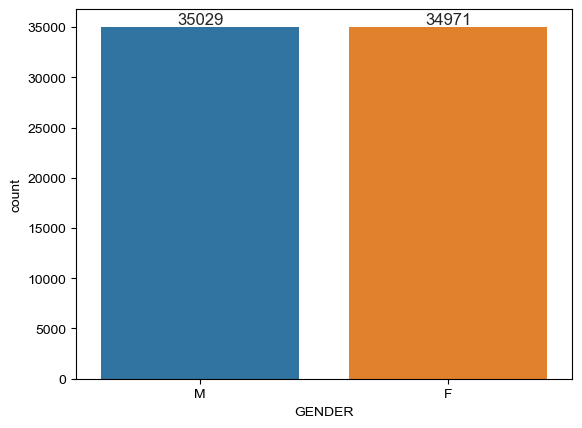

In [46]:
ax = sns.countplot(data = df, x = 'GENDER')           #product category
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='GENDER'>

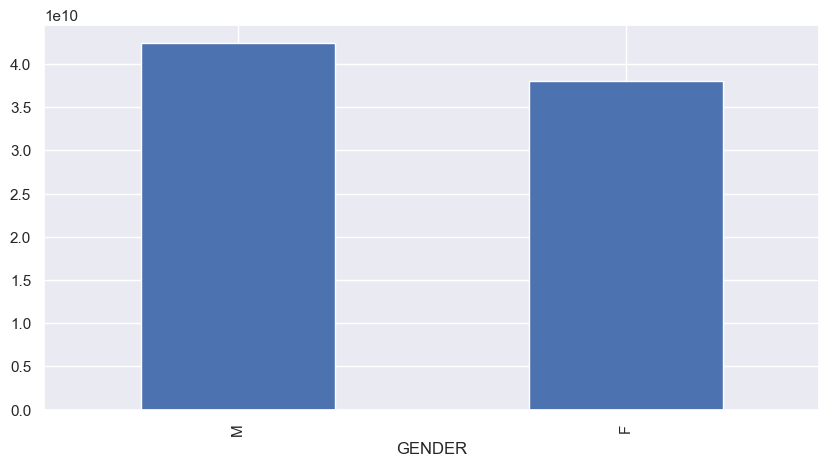

In [49]:
df.groupby('GENDER')['ANN_INCOME'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

ConversionError: Failed to convert value(s) to axis units: array([NaT, NaT], dtype=object)

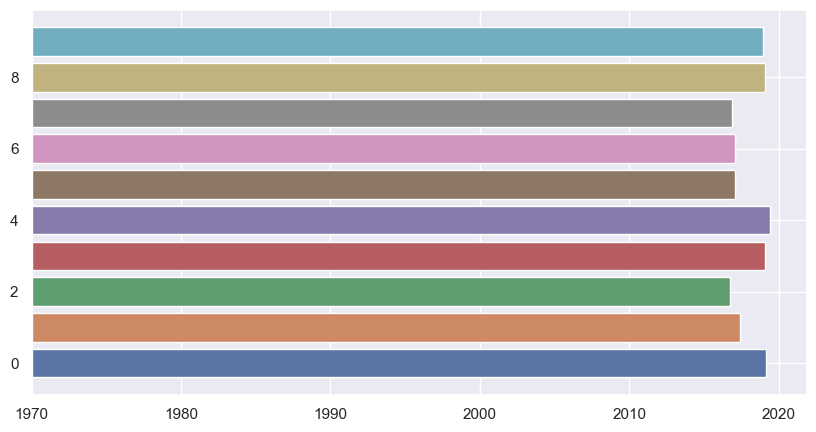

In [53]:
sales_state = df.groupby(['DT_MAINT'], as_index=False)['GENDER'].sum().sort_values(by='GENDER', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'DT_MAINT',y= 'GENDER')

JAPANESE DATASET

In [96]:
dk=pd.read_excel("JPN Data (1).xlsx")

In [91]:
dk

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1
...,...,...,...,...,...,...
39995,99988B18OG,49,M,478511.000000,464,1
39996,99990Q44VP,28,M,271419.000000,61,0
39997,99997Q09VJ,41,F,590704.000000,379,1
39998,99998J59EE,50,M,363160.000000,302,1


In [92]:
dk.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [93]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_CAR     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [95]:
pd.isnull(dk)

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
39995,False,False,False,False,False,False
39996,False,False,False,False,False,False
39997,False,False,False,False,False,False
39998,False,False,False,False,False,False


In [99]:
dk.describe()

,CURR_AGE,ANN_INCOME,AGE_CAR,PURCHASE
count,40000.00000,40000.000000,40000.000000,40000.000000
mean,44.99745,359398.878050,359.080250,0.575775
std,11.82008,175109.262950,203.063724,0.494231
min,25.00000,70089.000000,1.000000,0.000000
25%,35.00000,219766.000000,235.000000,0.000000
50%,45.00000,337656.833333,331.000000,1.000000
75%,55.00000,464261.000000,444.000000,1.000000
max,65.00000,799970.666667,1020.000000,1.000000


In [98]:
dk.count()

ID            40000
CURR_AGE      40000
GENDER        40000
ANN_INCOME    40000
AGE_CAR       40000
PURCHASE      40000
dtype: int64

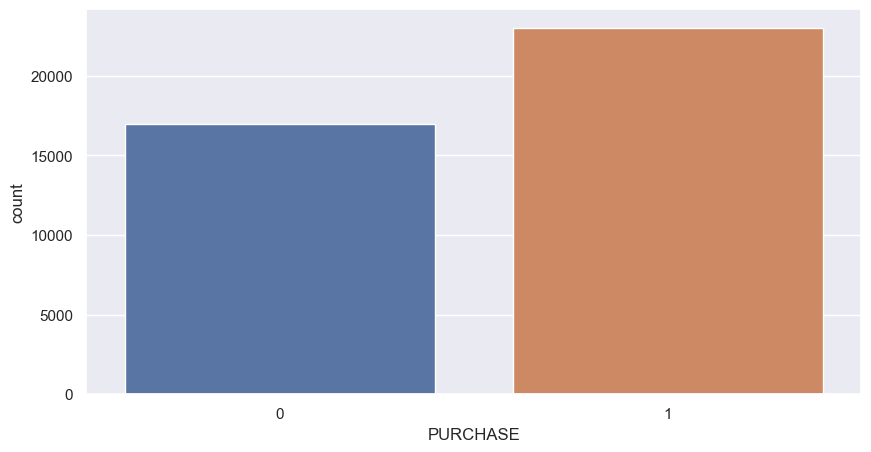

In [102]:
ax=sns.countplot(x='PURCHASE',data=dk)

<Axes: xlabel='GENDER', ylabel='ANN_INCOME'>

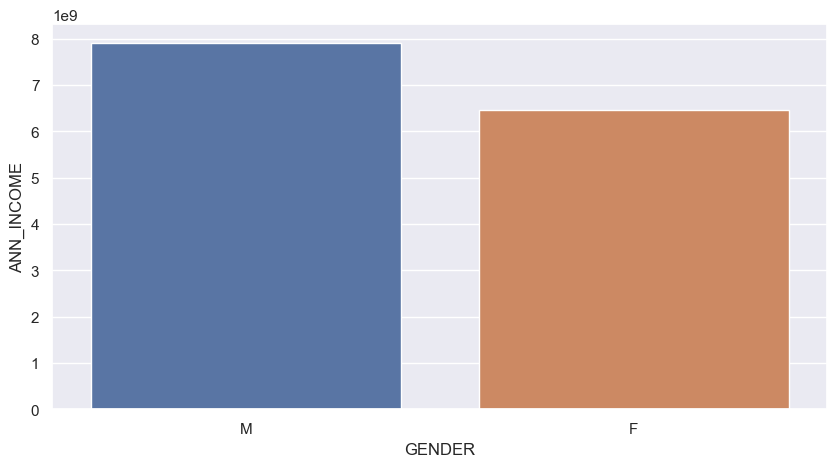

In [103]:
sales_gen = dk.groupby(['GENDER'], as_index=False)['ANN_INCOME'].sum().sort_values(by='ANN_INCOME', ascending=False)

sns.barplot(x = 'GENDER',y= 'ANN_INCOME' ,data = sales_gen)

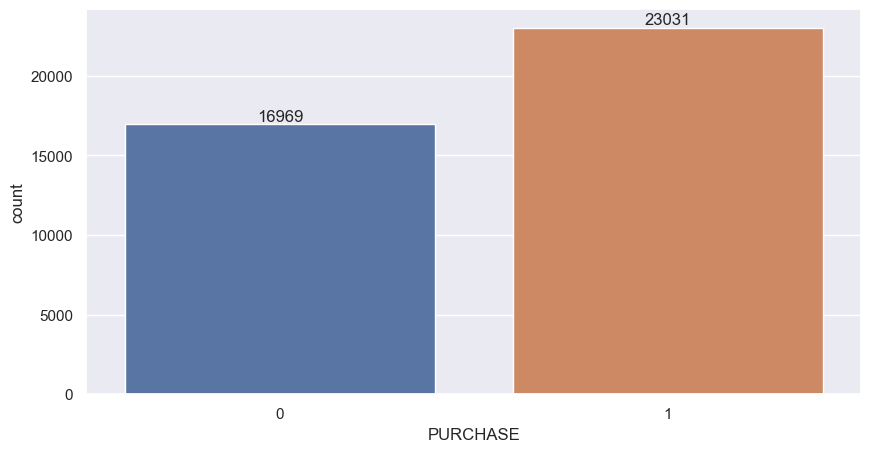

In [104]:
ax = sns.countplot(data = dk, x = 'PURCHASE')           #product category
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

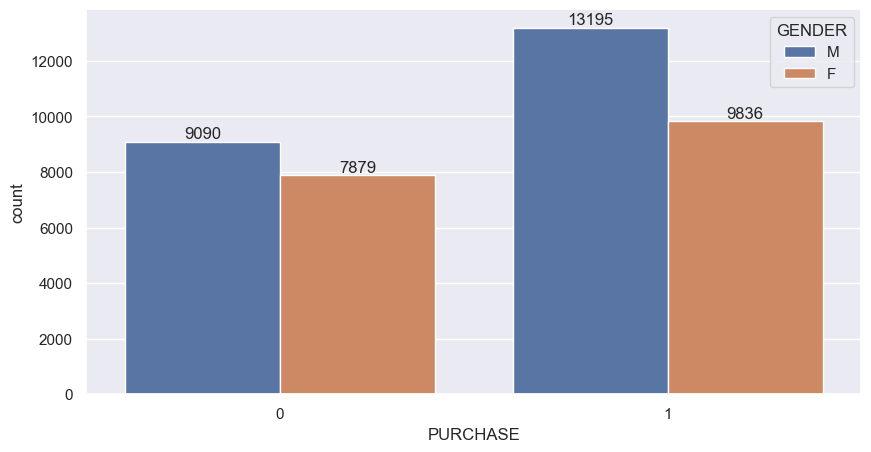

<Figure size 2500x2000 with 0 Axes>

In [105]:
ax = sns.countplot(data = dk, x = 'PURCHASE', hue='GENDER')
plt.figure(figsize=(25,20))
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='PURCHASE'>

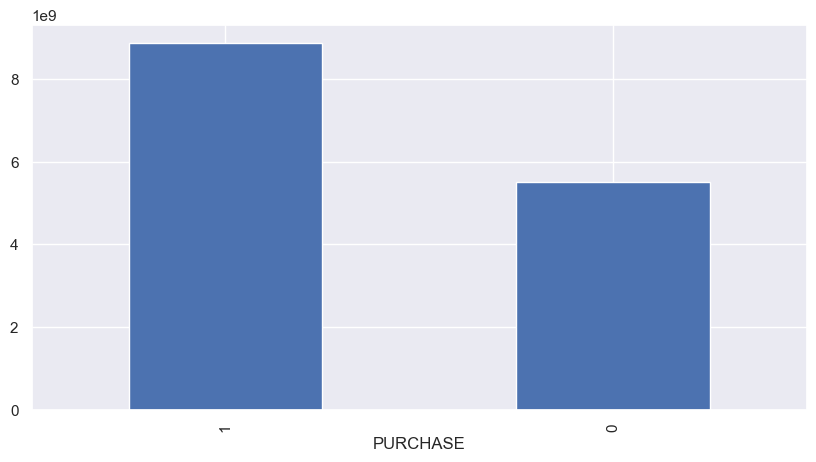

In [108]:
dk.groupby('PURCHASE')['ANN_INCOME'].sum().nlargest(20).sort_values(ascending=False).plot(kind='bar')